<div class="alert alert-info" role="alert">
  <h3 class="alert-heading">Welcome</h3>
  <p>My name is Tom Bresee.</p>
  <p>We are going to go step by step and dive into Databricks</p>
  <hr>
  <p class="mb-0">Let's get started...</p>
</div>

<br>

This is a function i create at the top to be able to show the methods that a particular function/object has.  In other words, if I have an object and want to list out all of the potential methods you can run on it, you would execute this function to get a list of the .methods and thus you would get an understanding at the high level of 'what you could do' with the object.  I find it very helpful.

In [4]:
# return all of the methods possible under this particular input object
def list_out_object_methods(your_object):
  for method in dir(your_object):
    if not method.startswith("_"):
      print(method)
      
# i.e. i create a spark object, but i want to see all the methods possible on 
# it, use this function.  It helps to list out ALL methods you can enter ! 

<br>

```
READ:

This is worth noting, because it trips people up all the time.

Normally when we run vanilla Apache Spark, we create something like this:

from pyspark.sql import SparkSession
spark = SparkSession \ 
    .builder \  
    .appName("Python Spark SQL basic example") \  
    .config("spark.some.config.option", "some-value") \  
    .getOrCreate()  


This has been done for you, so that when you open up your jupyter notebook, the spark session 
has *already* been created.  So you won't actually see that .builder type command anywhere...

```

In [7]:
print(type(spark))  # see ?  its already present...

<class 'pyspark.sql.session.SparkSession'>

In [8]:
# --- lets examine the spark instance ---
spark
#  < - - go to the gui left side, click cluster, and you can click on the UI button on that page

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v2.4.3 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [9]:
list_out_object_methods(spark)

Builder
builder
catalog
conf
createDataFrame
newSession
range
read
readStream
sparkContext
sql
stop
streams
table
udf
version

In [10]:
# So looking at the above:
# I can enter spark.stop to stop the instance
# I can enter spark.read to start reading in inputs
# I can enter spark.createDataFrame to create DFs
# I don't need to, but i could enter spark.Builder type commands if this was vanilla spark

In [11]:
# --- what is my apache spark version ? ---
spark.version

Out[ 7 ]: '2.4.3'

In [12]:
list_out_object_methods(spark.Builder)

appName
config
enableHiveSupport
getOrCreate
master

In [13]:
list_out_object_methods(spark.catalog)

cacheTable
clearCache
createExternalTable
createTable
currentDatabase
dropGlobalTempView
dropTempView
isCached
listColumns
listDatabases
listFunctions
listTables
recoverPartitions
refreshByPath
refreshTable
registerFunction
setCurrentDatabase
uncacheTable

In [14]:
# --- list my databases ---
spark.catalog.listDatabases()

Out[ 10 ]: [Database(name='default', description='Default Hive database', locationUri='dbfs:/user/hive/warehouse')]

<div class="alert alert-block alert-info">
Most people don't know that the differenes between Spark 1.0 and Spark 2.0 are pretty significant.  Including the actual spark instance (SparkSession)<div>

In [16]:
# --- libraries ---
from pyspark.sql.functions import *

# The File System

In [18]:
dbutils.fs.ls("dbfs:/")

Out[ 12 ]: [FileInfo(path='dbfs:/FileStore/', name='FileStore/', size=0),
 FileInfo(path='dbfs:/cbp.vds/', name='cbp.vds/', size=0),
 FileInfo(path='dbfs:/databricks/', name='databricks/', size=0),
 FileInfo(path='dbfs:/databricks-datasets/', name='databricks-datasets/', size=0),
 FileInfo(path='dbfs:/databricks-results/', name='databricks-results/', size=0),
 FileInfo(path='dbfs:/delta/', name='delta/', size=0),
 FileInfo(path='dbfs:/kdd/', name='kdd/', size=0),
 FileInfo(path='dbfs:/local_disk0/', name='local_disk0/', size=0),
 FileInfo(path='dbfs:/ml/', name='ml/', size=0),
 FileInfo(path='dbfs:/mnt/', name='mnt/', size=0),
 FileInfo(path='dbfs:/tmp/', name='tmp/', size=0),
 FileInfo(path='dbfs:/tom/', name='tom/', size=0),
 FileInfo(path='dbfs:/user/', name='user/', size=0)]

In [19]:
display(dbutils.fs.ls("dbfs:/"))

path,name,size
dbfs:/FileStore/,FileStore/,0
dbfs:/cbp.vds/,cbp.vds/,0
dbfs:/databricks/,databricks/,0
dbfs:/databricks-datasets/,databricks-datasets/,0
dbfs:/databricks-results/,databricks-results/,0
dbfs:/delta/,delta/,0
dbfs:/kdd/,kdd/,0
dbfs:/local_disk0/,local_disk0/,0
dbfs:/ml/,ml/,0
dbfs:/mnt/,mnt/,0


<div class="alert alert-info" role="alert">
  <h4 class="alert-heading">DBFS Root</h4>
  <p>The /FileStore contains imported data files, generated plots, and uploaded libraries.  The /databricks-datasets contains sample public datasets.  The /databricks-results contains files generated by downloading the full results of a query.</p>
</div>

In [21]:
dbutils.fs.ls("dbfs:/FileStore")
# FileStore stores uploaded data and jars etc 

Out[ 14 ]: [FileInfo(path='dbfs:/FileStore/import-stage/', name='import-stage/', size=0),
 FileInfo(path='dbfs:/FileStore/jars/', name='jars/', size=0),
 FileInfo(path='dbfs:/FileStore/plots/', name='plots/', size=0),
 FileInfo(path='dbfs:/FileStore/tables/', name='tables/', size=0)]

In [22]:
dbutils.fs.ls("/databricks-datasets/samples/docs/")

Out[ 16 ]: [FileInfo(path='dbfs:/databricks-datasets/samples/docs/README.md', name='README.md', size=3137)]

In [23]:
# --- databricks comes with some cool datasets ---
display(dbutils.fs.ls("dbfs:/databricks-datasets"))

path,name,size
dbfs:/databricks-datasets/README.md,README.md,976
dbfs:/databricks-datasets/Rdatasets/,Rdatasets/,0
dbfs:/databricks-datasets/SPARK_README.md,SPARK_README.md,3359
dbfs:/databricks-datasets/adult/,adult/,0
dbfs:/databricks-datasets/airlines/,airlines/,0
dbfs:/databricks-datasets/amazon/,amazon/,0
dbfs:/databricks-datasets/asa/,asa/,0
dbfs:/databricks-datasets/atlas_higgs/,atlas_higgs/,0
dbfs:/databricks-datasets/bikeSharing/,bikeSharing/,0
dbfs:/databricks-datasets/cctvVideos/,cctvVideos/,0


In [24]:
display(dbutils.fs.ls("dbfs:/databricks-datasets/learning-spark-v2"))

path,name,size
dbfs:/databricks-datasets/learning-spark-v2/README-sf-fire-calls.md,README-sf-fire-calls.md,690
dbfs:/databricks-datasets/learning-spark-v2/sf-fire-calls.csv,sf-fire-calls.csv,1756709096


In [25]:
display(dbutils.fs.ls("dbfs:/databricks-datasets/learning-spark/data-001"))

path,name,size
dbfs:/databricks-datasets/learning-spark/data-001/call_signs2.txt,call_signs2.txt,7
dbfs:/databricks-datasets/learning-spark/data-001/callsign_tbl,callsign_tbl,8194
dbfs:/databricks-datasets/learning-spark/data-001/callsign_tbl_sorted,callsign_tbl_sorted,8194
dbfs:/databricks-datasets/learning-spark/data-001/callsigns,callsigns,69
dbfs:/databricks-datasets/learning-spark/data-001/cqlsh_setup,cqlsh_setup,288
dbfs:/databricks-datasets/learning-spark/data-001/fake_logs/,fake_logs/,0
dbfs:/databricks-datasets/learning-spark/data-001/favourite_animals.csv,favourite_animals.csv,42
dbfs:/databricks-datasets/learning-spark/data-001/flumeconf.cfg,flumeconf.cfg,656
dbfs:/databricks-datasets/learning-spark/data-001/int_string.csv,int_string.csv,25
dbfs:/databricks-datasets/learning-spark/data-001/pandainfo.json,pandainfo.json,146


In [26]:
display(dbutils.fs.ls("dbfs:/databricks-datasets/"))

path,name,size
dbfs:/databricks-datasets/README.md,README.md,976
dbfs:/databricks-datasets/Rdatasets/,Rdatasets/,0
dbfs:/databricks-datasets/SPARK_README.md,SPARK_README.md,3359
dbfs:/databricks-datasets/adult/,adult/,0
dbfs:/databricks-datasets/airlines/,airlines/,0
dbfs:/databricks-datasets/amazon/,amazon/,0
dbfs:/databricks-datasets/asa/,asa/,0
dbfs:/databricks-datasets/atlas_higgs/,atlas_higgs/,0
dbfs:/databricks-datasets/bikeSharing/,bikeSharing/,0
dbfs:/databricks-datasets/cctvVideos/,cctvVideos/,0


In [27]:
# --- The Definitive Guide is an O'Reilly book, very good ---
display(dbutils.fs.ls("dbfs:/databricks-datasets/definitive-guide/data"))

path,name,size
dbfs:/databricks-datasets/definitive-guide/data/activity-data/,activity-data/,0
dbfs:/databricks-datasets/definitive-guide/data/bike-data/,bike-data/,0
dbfs:/databricks-datasets/definitive-guide/data/binary-classification/,binary-classification/,0
dbfs:/databricks-datasets/definitive-guide/data/clustering/,clustering/,0
dbfs:/databricks-datasets/definitive-guide/data/flight-data/,flight-data/,0
dbfs:/databricks-datasets/definitive-guide/data/flight-data-hive/,flight-data-hive/,0
dbfs:/databricks-datasets/definitive-guide/data/multiclass-classification/,multiclass-classification/,0
dbfs:/databricks-datasets/definitive-guide/data/regression/,regression/,0
dbfs:/databricks-datasets/definitive-guide/data/retail-data/,retail-data/,0
dbfs:/databricks-datasets/definitive-guide/data/sample_libsvm_data.txt,sample_libsvm_data.txt,104736


In [28]:
display(dbutils.fs.ls("/databricks-datasets/samples/data/mllib"))

path,name,size
dbfs:/databricks-datasets/samples/data/mllib/.DS_Store,.DS_Store,6148
dbfs:/databricks-datasets/samples/data/mllib/als/,als/,0
dbfs:/databricks-datasets/samples/data/mllib/gmm_data.txt,gmm_data.txt,63973
dbfs:/databricks-datasets/samples/data/mllib/kmeans_data.txt,kmeans_data.txt,72
dbfs:/databricks-datasets/samples/data/mllib/lr-data/,lr-data/,0
dbfs:/databricks-datasets/samples/data/mllib/lr_data.txt,lr_data.txt,197105
dbfs:/databricks-datasets/samples/data/mllib/pagerank_data.txt,pagerank_data.txt,24
dbfs:/databricks-datasets/samples/data/mllib/pic_data.txt,pic_data.txt,164
dbfs:/databricks-datasets/samples/data/mllib/ridge-data/,ridge-data/,0
dbfs:/databricks-datasets/samples/data/mllib/sample_binary_classification_data.txt,sample_binary_classification_data.txt,104736


In [29]:
# --- lets read a random README.md ---
with open("/dbfs/databricks-datasets/README.md") as f:
    x = ''.join(f.readlines())
print(x)

Databricks Hosted Datasets
==========================

The data contained within this directory is hosted for users to build 
data pipelines using Apache Spark and Databricks.

License
-------
Unless otherwise noted (e.g. within the README for a given data set), the data 
is licensed under Creative Commons Attribution 4.0 International (CC BY 4.0),
which can be viewed at the following url:
[http://creativecommons.org/licenses/by/4.0/legalcode](http://creativecommons.org/licenses/by/4.0/legalcode)

Contributions and Requests
--------------------------
To request or contribute new datasets to this repository, please send an email
to: hosted-datasets@databricks.com.

When making the request, include the README.md file you want to publish. Make
sure the file includes information about the source of the data, the license, 
and how to get additional information. Please ensure the license for this 
data allows it to be hosted by Databricks and consumed by the public.

In [30]:
# dbutils.fs provides file-system-like commands to access files in DBFS
list_out_object_methods(dbutils.fs)
# you can mkdirs, put files, 'head', remove, 

cacheFiles
cacheTable
check_types
cp
create_list_from_jschema
dbcore
entry_point
fsutils
head
help
ls
mkdirs
mount
mounts
mv
prettify_exception_message
print_return
put
py_shell
refreshMounts
rm
sc
uncacheFiles
uncacheTable
unmount

In [31]:
#write a file to DBFS using Python I/O APIs
with open("/dbfs/tmp/test_dbfs.txt", 'w') as f:
  f.write("Apache Spark is awesome!\n")
  f.write("This is fun\n")
  f.write("End of example!")

In [32]:
# read the file
with open("/dbfs/tmp/test_dbfs.txt", "r") as f_read:
  for line in f_read:
    print (line)

Apache Spark is awesome!

This is fun

End of example!

# Quick Viz

In [34]:
# note that you can flip between python, R, Scala, and direct SQL

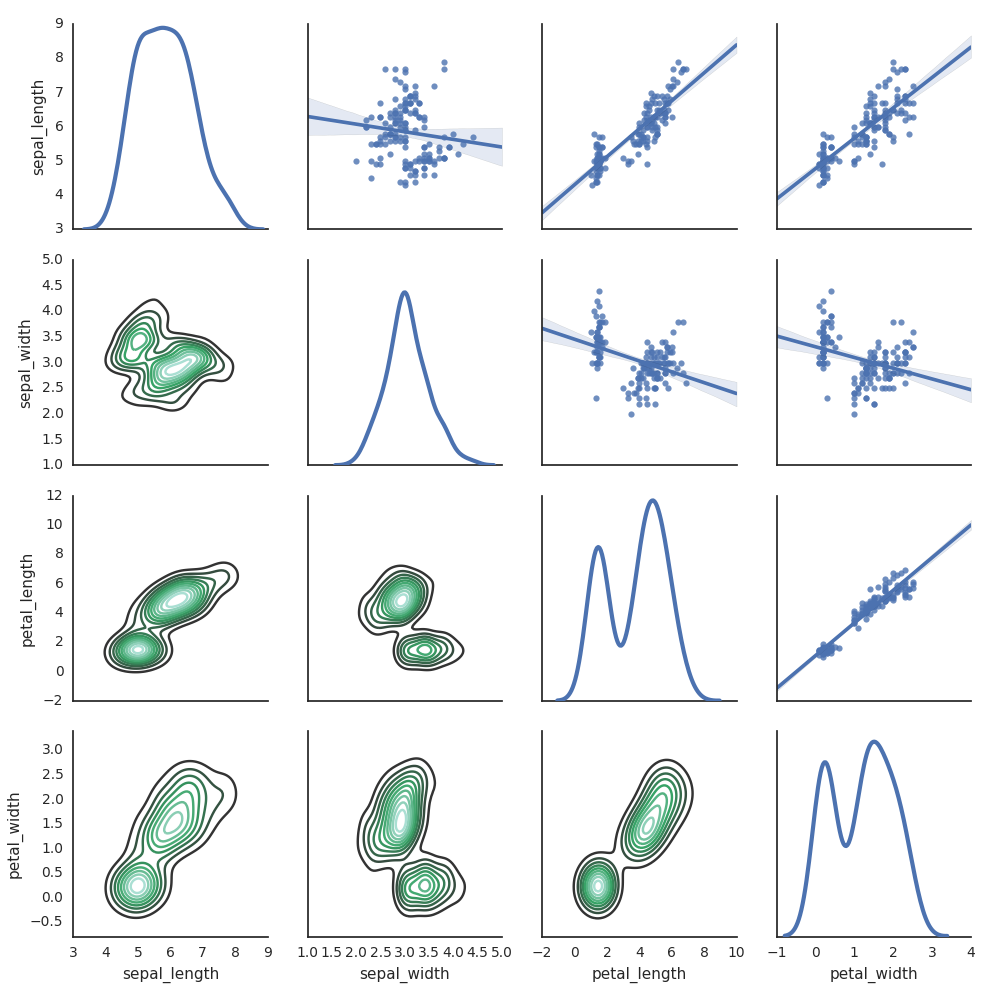

In [35]:
import seaborn as sns
sns.set(style="white")

df = sns.load_dataset("iris")
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3)

g.map_upper(sns.regplot)

display(g.fig)

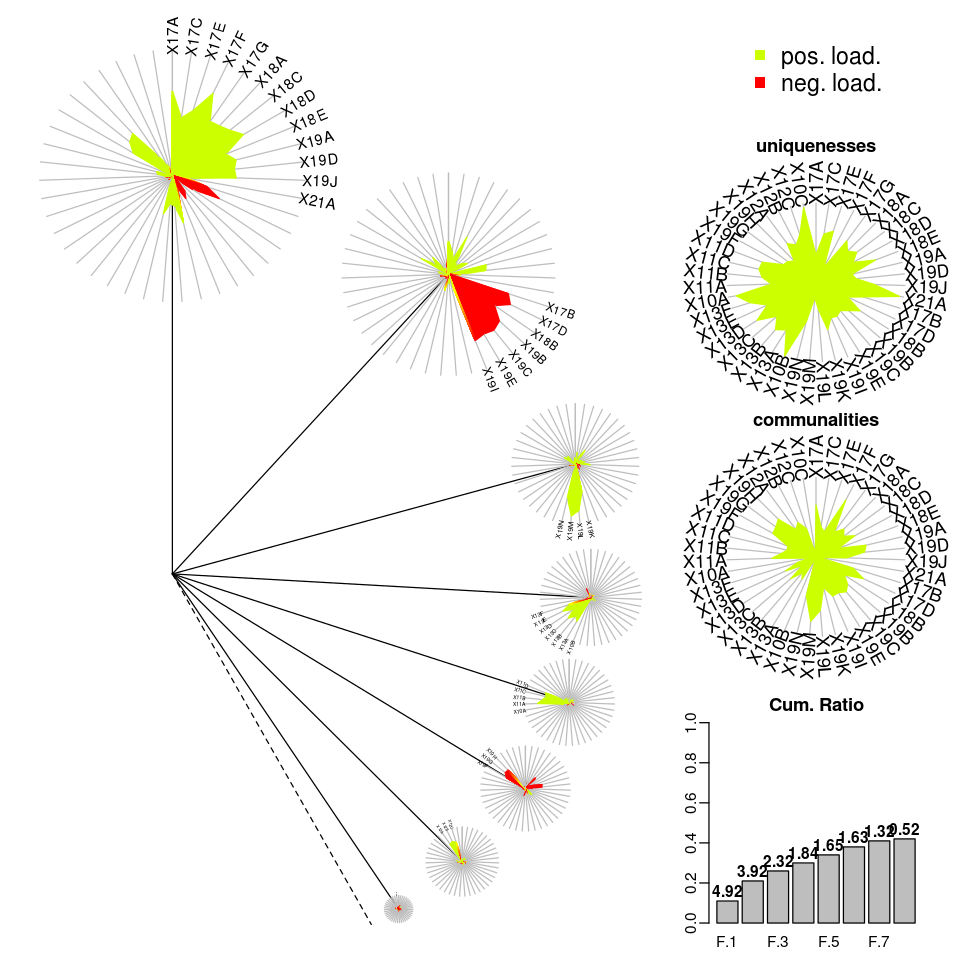

In [36]:
%r
install.packages("DandEFA", repos = "http://cran.us.r-project.org")
library(DandEFA)
data(timss2011)
timss2011 <- na.omit(timss2011)
dandpal <- rev(rainbow(100, start = 0, end = 0.2))
facl <- factload(timss2011,nfac=5,method="prax",cormeth="spearman")
dandelion(facl,bound=0,mcex=c(1,1.2),palet=dandpal)
facl <- factload(timss2011,nfac=8,method="mle",cormeth="pearson")
dandelion(facl,bound=0,mcex=c(1,1.2),palet=dandpal)

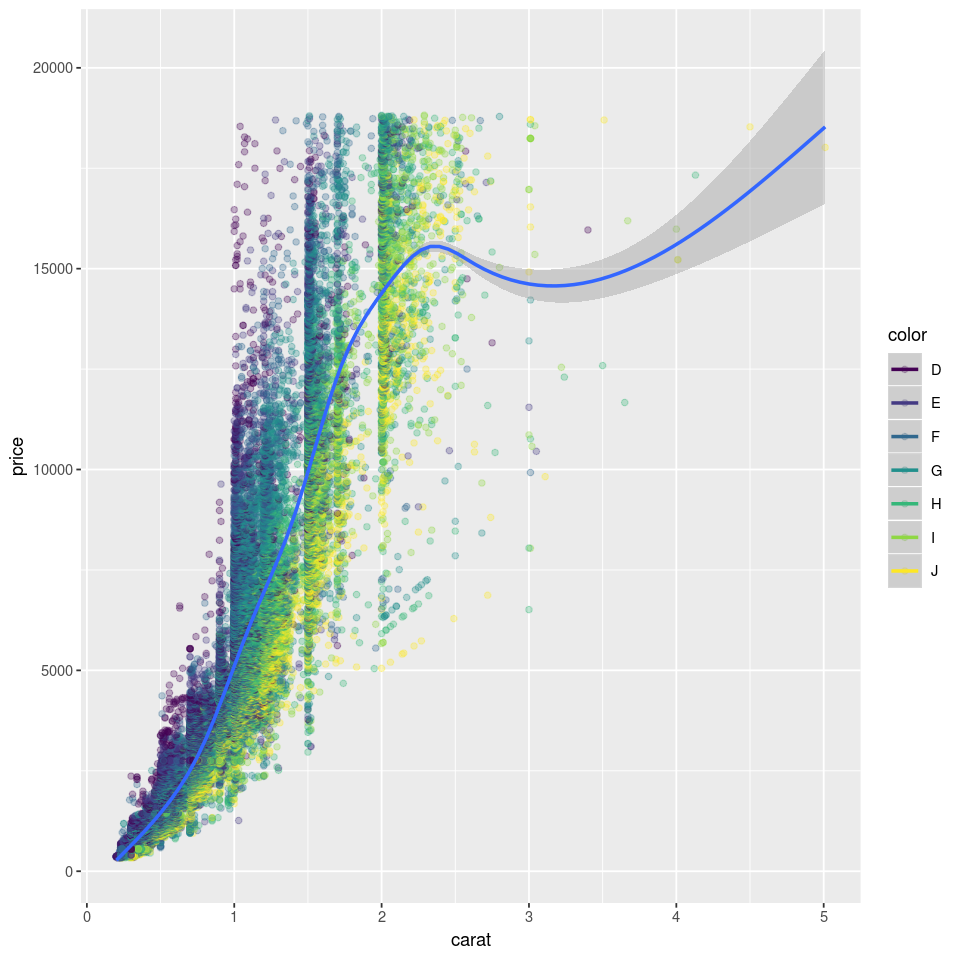

In [37]:
%r
library(ggplot2)
ggplot(diamonds, aes(carat, price, color = color, group = 1)) + geom_point(alpha = 0.3) + stat_smooth()

In [38]:
#  if you register a spark DataFrame as a table, you can also query it with SQL to create SQL visualizations...

<br>

## Interacting with Spark

In [41]:
display(dbutils.fs.ls("dbfs:/databricks-datasets/Rdatasets/data-001"))

path,name,size
dbfs:/databricks-datasets/Rdatasets/data-001/Makefile,Makefile,709
dbfs:/databricks-datasets/Rdatasets/data-001/README.rst,README.rst,2091
dbfs:/databricks-datasets/Rdatasets/data-001/Rdatasets.R,Rdatasets.R,2538
dbfs:/databricks-datasets/Rdatasets/data-001/csv/,csv/,0
dbfs:/databricks-datasets/Rdatasets/data-001/datasets.csv,datasets.csv,168536
dbfs:/databricks-datasets/Rdatasets/data-001/datasets.html,datasets.html,301883
dbfs:/databricks-datasets/Rdatasets/data-001/doc/,doc/,0
dbfs:/databricks-datasets/Rdatasets/data-001/docs2rst.py,docs2rst.py,1156
dbfs:/databricks-datasets/Rdatasets/data-001/license/,license/,0


In [42]:
# --- import data, and create dataframe ---
# use the standard 'diamonds.csv' dataset...

sparkDF = spark.read.format('csv').\
          options(header='true', inferSchema='true').\
          load('/databricks-datasets/Rdatasets/data-001/csv/ggplot2/diamonds.csv')

<div class="alert alert-block alert-warning">
<b>Note:</b> A lot just happened here. We imported (loaded) the dataset, inferred the schema it was using (such as strings or numbers/values), used its existing 'header', and 'read' in the data to a dataframe.  At this point, its 'queryable'...
</div>

In [44]:
# --- list out all the methods possible on this DF ---
list_out_object_methods(sparkDF)

agg
alias
approxQuantile
cache
checkpoint
coalesce
colRegex
collect
columns
corr
count
cov
createGlobalTempView
createOrReplaceGlobalTempView
createOrReplaceTempView
createTempView
crossJoin
crosstab
cube
describe
distinct
drop
dropDuplicates
drop_duplicates
dropna
dtypes
exceptAll
explain
fillna
filter
first
foreach
foreachPartition
freqItems
groupBy
groupby
head
hint
intersect
intersectAll
isLocal
isStreaming
is_cached
join
limit
localCheckpoint
na
orderBy
persist
printSchema
randomSplit
rdd
registerTempTable
repartition
repartitionByRange
replace
rollup
sample
sampleBy
schema
select
selectExpr
show
sort
sortWithinPartitions
sql_ctx
stat
storageLevel
subtract
summary
take
toDF
toJSON
toLocalIterator
toPandas
transform
union
unionAll
unionByName
unpersist
where
withColumn
withColumnRenamed
withWatermark
write
writeStream

In [45]:
print(type(sparkDF))
# this is in fact a spark DataFrame

<class 'pyspark.sql.dataframe.DataFrame'>

In [46]:
display(sparkDF.describe())

summary,_c0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
mean,26970.5,0.7979397478679852,null,null,null,61.74940489432624,57.45718390804603,3932.799721913237,5.731157211716609,5.734525954764462,3.5387337782723316
stddev,15571.281096942537,0.4740112444054196,null,null,null,1.4326213188336525,2.2344905628213247,3989.439738146397,1.1217607467924915,1.1421346741235616,0.7056988469499883
min,1,0.2,Fair,D,I1,43.0,43.0,326,0.0,0.0,0.0
max,53940,5.01,Very Good,J,VVS2,79.0,95.0,18823,10.74,58.9,31.8


<div class="alert alert-block alert-info">
A Databricks database is a collection of tables. A Databricks table is a collection of structured data. Tables are equivalent to Apache Spark DataFrames. This means that you can cache, filter, and perform any operations supported by DataFrames on tables. You can query tables with Spark APIs and Spark SQL.
</div>

In [48]:
help(sparkDF.createOrReplaceTempView)

Help on method createOrReplaceTempView in module pyspark.sql.dataframe:

createOrReplaceTempView(name) method of pyspark.sql.dataframe.DataFrame instance
 Creates or replaces a local temporary view with this DataFrame.
 
 The lifetime of this temporary table is tied to the :class:`SparkSession`
 that was used to create this :class:`DataFrame`.
 
 >>> df.createOrReplaceTempView("people")
 >>> df2 = df.filter(df.age > 3)
 >>> df2.createOrReplaceTempView("people")
 >>> df3 = spark.sql("select * from people")
 >>> sorted(df3.collect()) == sorted(df2.collect())
 True
 >>> spark.catalog.dropTempView("people")
 
 .. versionadded:: 2.0

In [49]:
sparkDF.describe()

Out[ 42 ]: DataFrame[summary: string, _c0: string, carat: string, cut: string, color: string, clarity: string, depth: string, table: string, price: string, x: string, y: string, z: string]

In [50]:
help(sparkDF.write.saveAsTable)

Help on method saveAsTable in module pyspark.sql.readwriter:

saveAsTable(name, format=None, mode=None, partitionBy=None, **options) method of pyspark.sql.readwriter.DataFrameWriter instance
 Saves the content of the :class:`DataFrame` as the specified table.
 
 In the case the table already exists, behavior of this function depends on the
 save mode, specified by the `mode` function (default to throwing an exception).
 When `mode` is `Overwrite`, the schema of the :class:`DataFrame` does not need to be
 the same as that of the existing table.
 
 * `append`: Append contents of this :class:`DataFrame` to existing data.
 * `overwrite`: Overwrite existing data.
 * `error` or `errorifexists`: Throw an exception if data already exists.
 * `ignore`: Silently ignore this operation if data already exists.
 
 :param name: the table name
 :param format: the format used to save
 :param mode: one of `append`, `overwrite`, `error`, `errorifexists`, `ignore` (default: error)
 :param partitionBy: names of partitioning columns
 :param options: all other string options
 
 .. versionadded:: 1.4

In [51]:
%sql
/* I can now access this Table via straight SQL */
SELECT * FROM diamonds LIMIT(6)

_c0,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


<div class="alert alert-block alert-info">
<b>Important:</b> Once table is in a databricks Table, it can be queried with any language you want, and especially we enter the domain of SQL where you can use straight standard SQL commands to go nuts...
</div>

In [53]:
%sql
/* query  */
SELECT carat,cut,clarity,price FROM diamonds WHERE price>300 AND clarity='SI1' AND carat>.25 LIMIT(7)
/* this is a very powerful feature */

carat,cut,clarity,price
0.26,Very Good,SI1,337
0.3,Good,SI1,339
0.3,Good,SI1,351
0.3,Good,SI1,351
0.3,Very Good,SI1,351
0.31,Very Good,SI1,353
0.31,Very Good,SI1,353


In [54]:
# We can also use spark.sql as well to query the DF
# The spark.sql(" - verbage - ") is treated as if its SQL command...
display(spark.sql("SELECT carat,cut,color,clarity FROM diamonds LIMIT(7)"))

carat,cut,color,clarity
0.23,Ideal,E,SI2
0.21,Premium,E,SI1
0.23,Good,E,VS1
0.29,Premium,I,VS2
0.31,Good,J,SI2
0.24,Very Good,J,VVS2
0.24,Very Good,I,VVS1


In [55]:
# this has been a good intro, lets keep going in the next notebook...